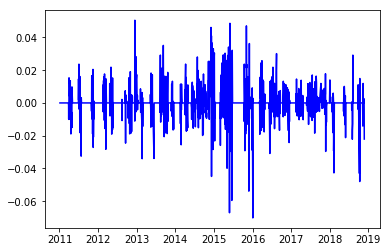

In [1]:
#读取数据
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import back_test
import a2_printpic
import a4_rishouyilv

df=pd.read_csv('./data_total.csv',encoding='utf-8-sig',index_col='DateTime')
df.index=pd.DatetimeIndex(df.index)


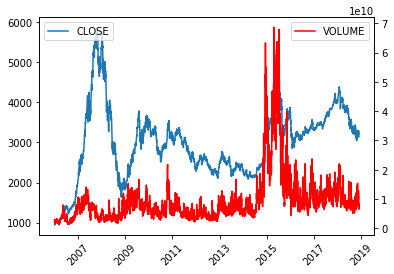

(0.40349140571435566, 0.491973566633162)

In [2]:

a2_printpic.print_pic(df=df,y_name='VOLUME')

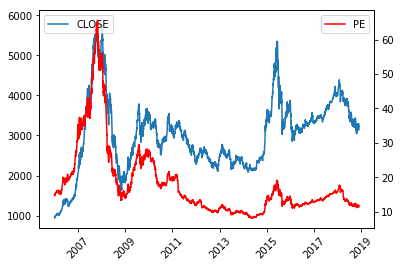

(0.5096683318447895, 0.3895748920074733)

In [3]:
a2_printpic.print_pic(df=df,y_name='PE')

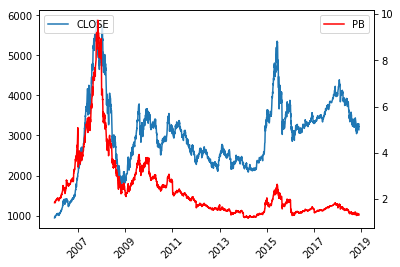

(0.46189041391036795, 0.22865915395683054)

In [4]:
a2_printpic.print_pic(df=df,y_name='PB')

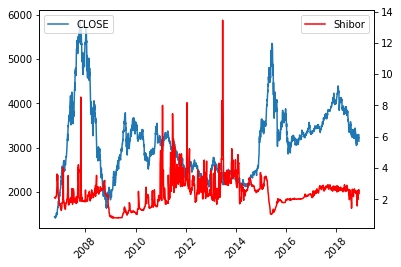

(-0.16499462621033706, -0.19576688310901097)

In [5]:
a2_printpic.print_pic(df=df,y_name='Shibor')

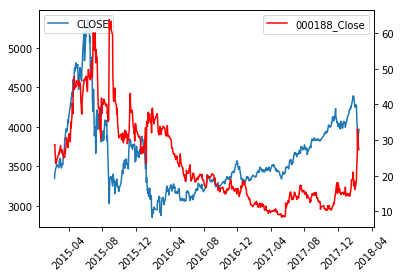

(0.29720711985785453, 0.014779032962958058)

In [6]:
a2_printpic.print_pic(df=df,y_name='000188_Close')

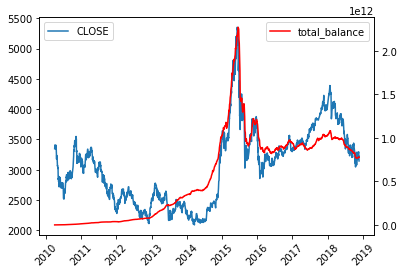

(0.7745975237286803, 0.6481469809679179)

In [7]:
a2_printpic.print_pic(df=df,y_name='total_balance')

In [8]:
index_to_mix=['VOLUME','PE','Shibor','total_balance']
index_to_mix_Z=['VOLUME-z','PE-z','Shibor-z','total_balance-z']

  

data_mulpti=df[index_to_mix+['CLOSE']]
data_mulpti.dropna(inplace=True)
for index in index_to_mix_Z:
    data_mulpti[index]=''


#Z-SCORE标准化
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
data_mulpti[index_to_mix_Z]=ss.fit_transform(data_mulpti[index_to_mix])

/Users/alex/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/Users/alex/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


/Users/alex/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/alex/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [9]:
index_to_PCA=['VOLUME-z','PE-z','total_balance-z']

from sklearn.decomposition import PCA
pca=PCA(n_components=3)
pca.fit(data_mulpti[index_to_PCA].values)

print(pca.explained_variance_ratio_)
print(pca.components_[0])
data_mulpti['t']=data_mulpti['VOLUME-z']*pca.components_[0][0]*\
                data_mulpti['PE-z']*pca.components_[0][1]*\
                    data_mulpti['total_balance-z']*pca.components_[0][2]

[0.595279   0.31716692 0.08755408]
[0.69349416 0.28396885 0.66213861]


/Users/alex/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


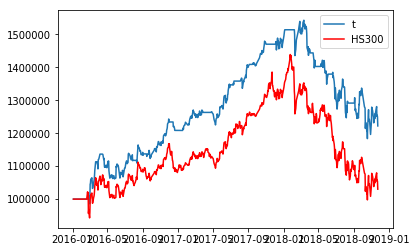

/Users/alex/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/alex/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


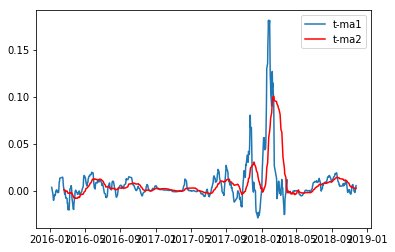

In [26]:
import  a3_back_test

dff=a3_back_test.back_test(d=data_mulpti,y_name='t',
                           start_year='2016',end_year='2018'
                       ,ma1=10,ma2=15,ma3=10,ma4=30)

d=data_mulpti['2016':'2018']
d['t-ma1']=d['t'].rolling(5).mean()
d['t-ma2']=d['t'].rolling(30).mean()
plt.plot(d.index, d['t-ma1'], )
plt.plot(d.index, d['t-ma2'], c='r')
plt.legend()
plt.show() 

In [35]:
import a4_rishouyilv

BartlettResult(statistic=-4.666391876918979e-13, pvalue=1.0)